# Set up the environment

In [4]:
!git clone https://github.com/WouterBant/diffusion-augmented-pixelsplat.git

Cloning into 'diffusion-augmented-pixelsplat'...
remote: Enumerating objects: 409, done.
remote: Counting objects: 100% (195/195), done.
remote: Compressing objects: 100% (116/116), done.
remote: Total 409 (delta 103), reused 129 (delta 76), pack-reused 214
Receiving objects: 100% (409/409), 2.99 MiB | 8.48 MiB/s, done.
Resolving deltas: 100% (140/140), done.


In [5]:
%cd diffusion-augmented-pixelsplat

/content/diffusion-augmented-pixelsplat


In [3]:
%pip install -qq -r installation_jobs/requirements.txt

  Running command git clone --filter=blob:none --quiet https://github.com/dcharatan/diff-gaussian-rasterization-modified /tmp/pip-req-build-904cf0vk
  Running command git submodule update --init --recursive -q


Add a shortcut in your own Google Drive account to the Re10k sample data shared by the authors:
https://drive.google.com/drive/folders/1joiezNCyQK2BvWMnfwHJpm2V77c7iYGe

(This is done because it is easier to copy using the Google Drive - Colab integration than downloading from the public link, as Google Drive gives multiple HTML popups/warnings in that case that you'd need to process)

In [9]:
# Give permission when asked to access your drive from this notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Download the empty folder that's currently checked into out repo, but which lacks the .torch files
!rm -rf "datasets/re10k"

# Copy the sample data from Google Drive to the local machine
!cp "/content/drive/MyDrive/dataset_subsets/re10k_subset.zip" "datasets/"

# Unzip
!unzip "datasets/re10k_subset.zip" -d "datasets"

# Rename to re10k
!mv "datasets/re10k_subset"  "datasets/re10k/"

Archive:  datasets/re10k_subset.zip
   creating: datasets/re10k_subset/
   creating: datasets/re10k_subset/train/
  inflating: datasets/re10k_subset/train/000002.torch  
  inflating: datasets/re10k_subset/train/000000.torch  
  inflating: datasets/re10k_subset/train/index.json  
  inflating: datasets/re10k_subset/train/000001.torch  
   creating: datasets/re10k_subset/test/
  inflating: datasets/re10k_subset/test/000001.torch  
  inflating: datasets/re10k_subset/test/index.json  
  inflating: datasets/re10k_subset/test/000000.torch  
  inflating: datasets/re10k_subset/test/000002.torch  


# Load and export images

In [6]:
from src.dataset.dataset_re10k import DatasetRE10k
from src.config import load_typed_root_config
from src.dataset.data_module import DataModule
from src.global_cfg import set_cfg
from hydra import compose, initialize_config_dir
from omegaconf import OmegaConf
import hydra
from torchvision.transforms import functional as F
import matplotlib.pyplot as plt
from pathlib import Path
from tqdm.autonotebook import tqdm, trange

In [7]:
# All configs are stored in Hydra, a config management system, so we need to load these
# to instantiate classes like the data loader.
with initialize_config_dir(version_base=None, config_dir=hydra.utils.to_absolute_path("config")):
    cfg_dict = compose(
        config_name="main.yaml", return_hydra_config=True, overrides=[]
    )
    # print(OmegaConf.to_yaml(cfg))

cfg = load_typed_root_config(cfg_dict)
set_cfg(cfg)

  warnings.warn(msg, UserWarning)



In [8]:
# Instantiate the DataModule based on the configs and data
data_module = DataModule(
        cfg.dataset,
        cfg.data_loader,
)

In [9]:
!rm -rf {target_dir}

In [10]:
# Export all test images into a folder
target_dir = Path("datasets/re10k/re10k_test_context_images")
target_dir.mkdir(exist_ok=True)

for data in tqdm(data_module.test_dataloader()):
    # print(data.keys()) # ['context', 'target', 'scene']

    # context/image has a shape of [1, 2, 3, 180, 320], so if I understand correctly
    # context is a pair of images that is used for creating the reconstruction
    # print(data["context"].keys()) # ['extrinsics', 'intrinsics', 'image', 'near', 'far', 'index']

    # target/image has a shape of [1, 46, 3, 180, 320], so I assume target is a set of other images
    # from the same video that we try to reconstruct, based on the two images in context
    # print(data["target"].keys()) # ['extrinsics', 'intrinsics', 'image', 'near', 'far', 'index']

    # the scene id I presume
    # print(len(data["scene"])) # a single scene in a given batch, at least for the test set
    assert len(data["scene"]) == 1
    scene_id = data["scene"][0]

    image_group = "context" # context or target, save the context images for now
    images = data[image_group]["image"]
    # print(images.shape)
    for scene_num in range(images.shape[0]):
        for image_num in range(images[scene_num].shape[0]):
            pil_image = F.to_pil_image(images[scene_num, image_num])
            fn = f"{scene_id}_{image_group}_{image_num}.png"
            print(fn)
            pil_image.save(target_dir / fn, "PNG", compress_level=0) # save with lossless compression
            # plt.imshow(pil_image)
            # plt.show()
            # break
        # break
    # break

  warnings.warn(_create_warning_msg(



  0%|          | 0/41 [00:00<?, ?it/s]

  self.pid = os.fork()



5aca87f95a9412c6_context_0.png
5aca87f95a9412c6_context_1.png
322261824c4a3003_context_0.png
322261824c4a3003_context_1.png
17d9303ee77c3a3d_context_0.png
17d9303ee77c3a3d_context_1.png
bc95e5c7e357f1b7_context_0.png
bc95e5c7e357f1b7_context_1.png
f7c0fa5b81552d35_context_0.png
f7c0fa5b81552d35_context_1.png
ffa95c3b40609c76_context_0.png
ffa95c3b40609c76_context_1.png
34b0658a5c200cdf_context_0.png
34b0658a5c200cdf_context_1.png
a56ba2efb5e3fdd9_context_0.png
a56ba2efb5e3fdd9_context_1.png
a47b88040452d7d9_context_0.png
a47b88040452d7d9_context_1.png
28e8300e004ab30b_context_0.png
28e8300e004ab30b_context_1.png
c48f19e2ffa52523_context_0.png
c48f19e2ffa52523_context_1.png
0d4de33c6888a754_context_0.png
0d4de33c6888a754_context_1.png
6558c5f10d45a929_context_0.png
6558c5f10d45a929_context_1.png
1214f2a11a9fc1ed_context_0.png
1214f2a11a9fc1ed_context_1.png
41bcd011f99bfb66_context_0.png
41bcd011f99bfb66_context_1.png
89ea49cd9865aeff_context_0.png
89ea49cd9865aeff_context_1.png
a9b3ff60

In [11]:
!cp -r {target_dir} "/content/drive/MyDrive/Shared/"

# Generate masks and diffuse images

In [1]:
%pip install -q -U diffusers datasets transformers accelerate ftfy pyarrow==9.0.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 510.5/510.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.4/297.4 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.4/54.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 25.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 22.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━

In [7]:
import hashlib
from diffusers import StableDiffusionInpaintPipeline
import torch
from PIL import Image
from pathlib import Path
import numpy as np
import math
from diffusers.utils import load_image, make_image_grid
from tqdm.autonotebook import tqdm

def generate_mask(image_name, img_width, img_height, mask_width, mask_height=-1, random_num=0):
    """
    Generate a mask of a given width for an image of a given size.

    The mask is random but idempotent. This means that different images get different random mask,
    but the same image gets the same mask.

    :param image_name: Name of the image, used for generating a stable random mask
    :param img_width: Image width
    :param img_height: Image height
    :param mask_width: Mask width
    :param mask_height: Mask height. If -1 then a height is automatically calculated to make the mask aspect
        ratio equal to the image ratio.
    :param random_num: An optional random number that is used when generating the random mask. This can be used
        to generate different masks for the same image. It is advised to pass the samee number here for all images
        to make generation reproducible.
    """
    if mask_height == -1:
        # calculate a proportional mask height
        mask_height = math.floor(img_height / img_width * mask_width)
    mask_left = (int(hashlib.sha256((image_name + str(random_num)).encode()).hexdigest(), base=16)) % (img_width - mask_width)
    mask_top = (int(hashlib.sha256((image_name + str(random_num)).encode()).hexdigest(), base=16) + random_num) % (img_height - mask_height)
    return mask_left, mask_left + mask_width, mask_top, mask_top + mask_height

def get_masked_image(image_array, image_fn, mask_width, mask_height=-1, random_num=0):
    """ Get a masked version of an image. See generate_mask for meaning of the parameters.  """
    masked_image_array = image_array.copy()
    height, width, _ = image_array.shape
    mask_x0, mask_x1, mask_y0, mask_y1 = generate_mask(image_fn, width, height, mask_width, mask_height, random_num)
    # print(mask_x0, mask_x1, mask_y0, mask_y1)
    mask_array = np.zeros_like(image_array[:, :, 0])
    mask_array[mask_y0:mask_y1, mask_x0:mask_x1] = 1
    # image_array[mask_array] = 0 # I think this should work but I made a stupid mistake..?
    masked_image_array[mask_y0:mask_y1, mask_x0:mask_x1] = 0

    return masked_image_array, mask_array

Apply 3 different mask sizes to all test images, display and save the results to a folder

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/76 [00:00<?, ?it/s]

57d25dafabb5a238_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

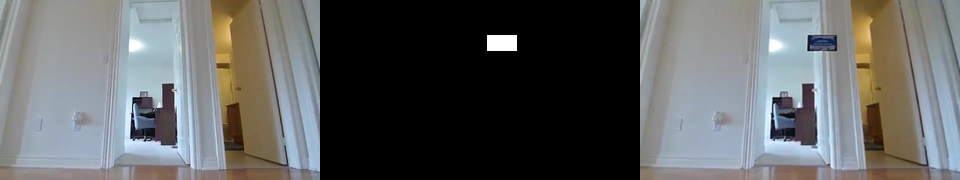

6771a51bf0cfce7f_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

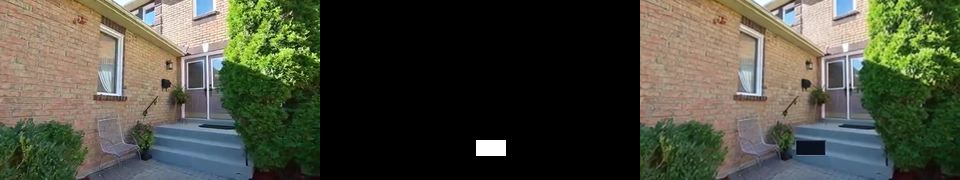

57d25dafabb5a238_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

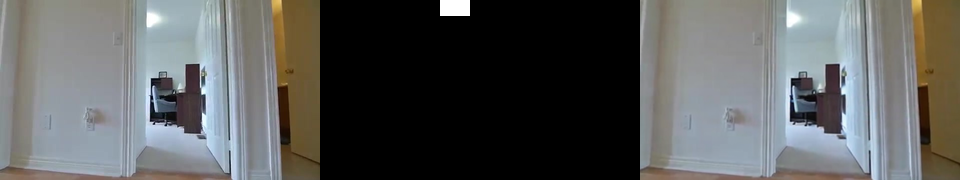

5aca87f95a9412c6_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

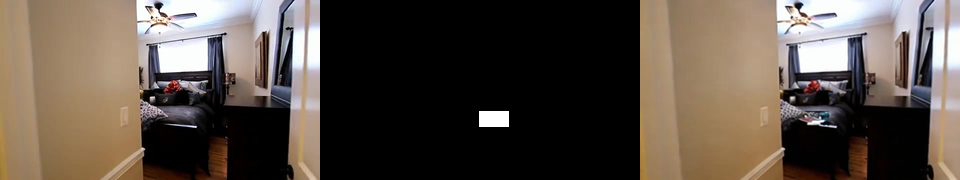

5aca87f95a9412c6_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

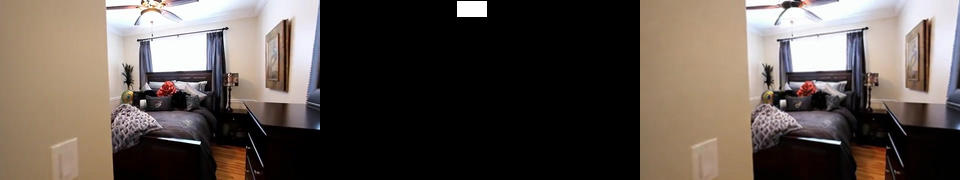

bc95e5c7e357f1b7_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

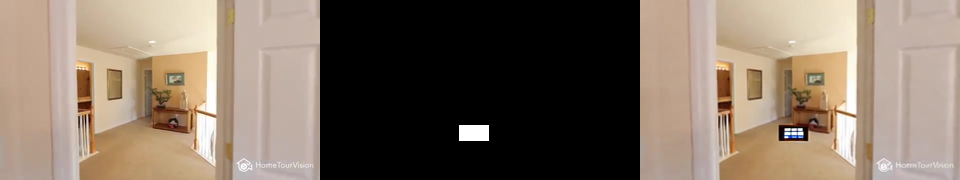

6771a51bf0cfce7f_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

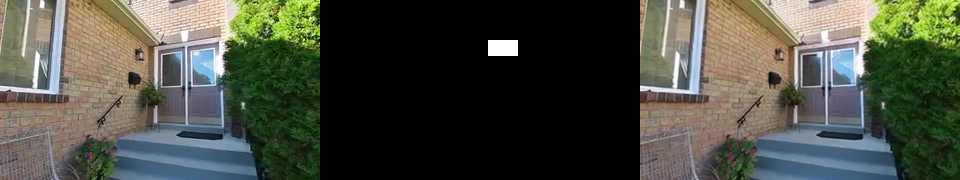

17d9303ee77c3a3d_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

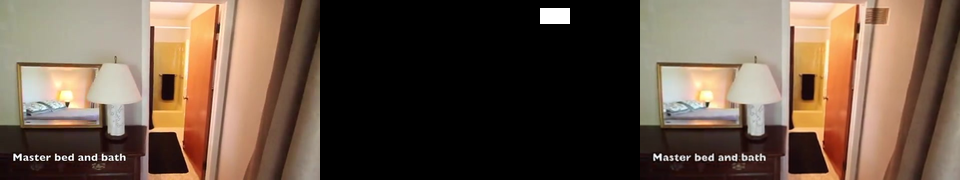

322261824c4a3003_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

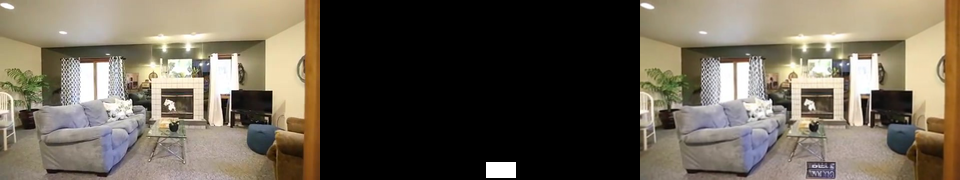

322261824c4a3003_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

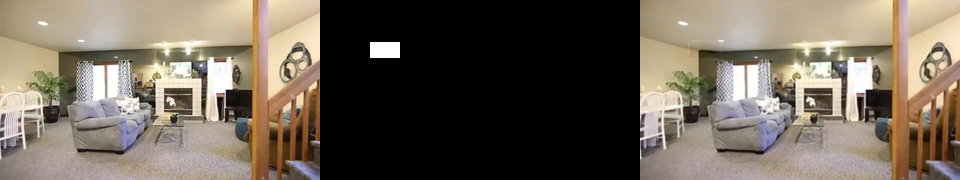

17d9303ee77c3a3d_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

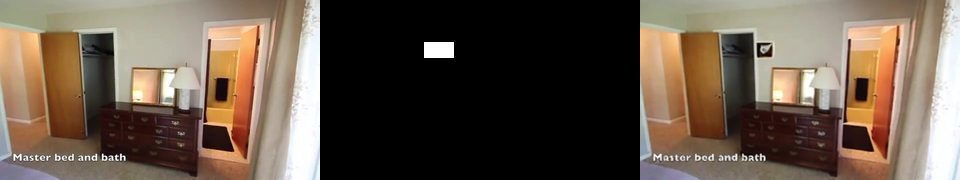

f7c0fa5b81552d35_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

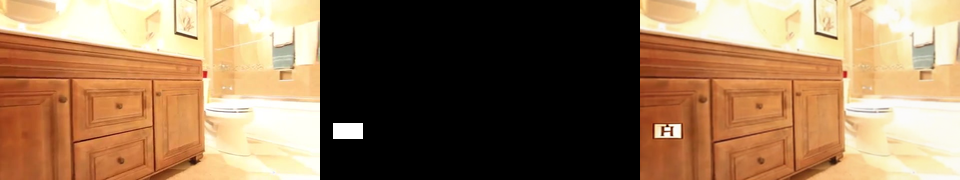

bc95e5c7e357f1b7_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

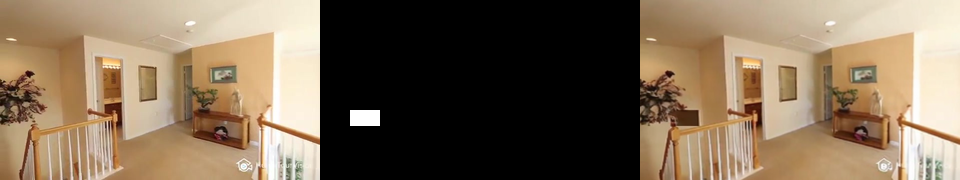

ffa95c3b40609c76_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

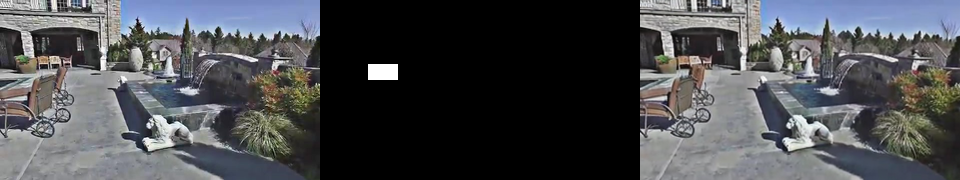

ffa95c3b40609c76_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

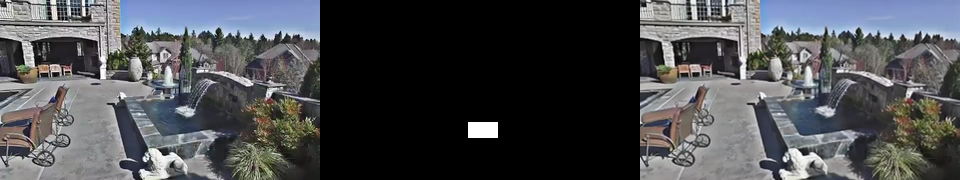

34b0658a5c200cdf_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

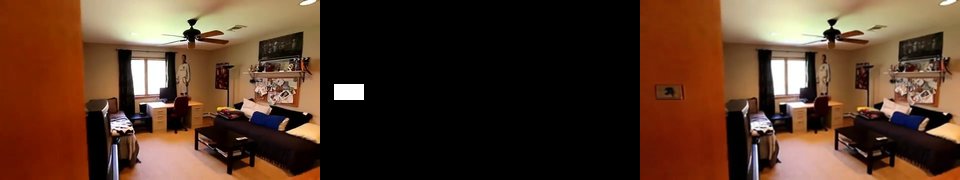

34b0658a5c200cdf_context_1.png


  0%|          | 0/50 [00:00<?, ?it/s]

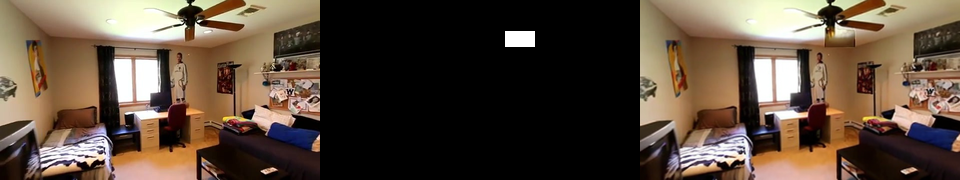

a56ba2efb5e3fdd9_context_0.png


  0%|          | 0/50 [00:00<?, ?it/s]

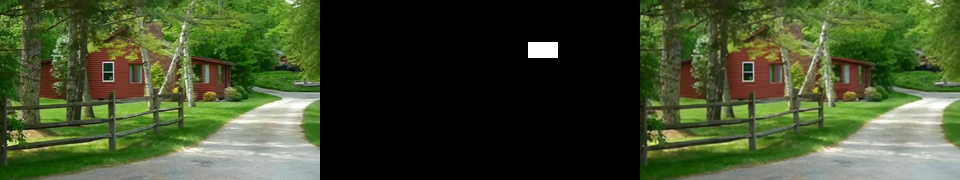

In [ ]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-inpainting",
    torch_dtype=torch.float16,
)
pipe.to("cuda")
prompt = "An image of a home."

# images_dir = Path("datasets/re10k/re10k_test_context_images/")
images_dir = Path("/content/drive/MyDrive/Shared/re10k_test_context_images/")
diff_images_dir = images_dir.with_stem("re10k_test_context_images_diff")

diff_images_dir.mkdir(exist_ok=True)

for mask_width in tqdm([30, 100, 200]):
    output_dir = diff_images_dir / f"mask_width_{mask_width}"
    output_dir.mkdir(exist_ok=True)
    for image_path in tqdm(list(images_dir.glob("*.png"))):
        image_fn = Path(image_path.name)
        print(image_fn)
        image = Image.open(images_dir / image_fn)
        # display(image)
        image_array = np.asarray(image)
        height, width, _ = image_array.shape
        # FIXME: little trick: do not pass the last character of the image name, so the two related images get the same mask
        masked_image_array, mask_array = get_masked_image(image_array, str(image_fn)[:-2], mask_width=mask_width)
        masked_image = Image.fromarray(np.uint8(masked_image_array))
        mask_image = Image.fromarray(np.bool_(mask_array))
        # display(masked_image)

        #image and mask_image should be PIL images.
        #The mask structure is white for inpainting and black for keeping as is
        diffused_image = pipe(prompt=prompt, image=masked_image, mask_image=mask_image).images[0]
        diffused_image = diffused_image.resize((width, height)) # FIXME this shouldn't be necessary
        diffused_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_diffused"))
        mask_image.save(output_dir / image_fn.with_stem(image_fn.stem + f"_mask"))
        # display(diffused_image)

        display(make_image_grid([image, mask_image, diffused_image], rows=1, cols=3))

        # not sure if this is really needed
        image.close()
        masked_image.close()
        mask_image.close()
        diffused_image.close()